In [154]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## • analyze only the users and not the admins
## • take into account only logs from the table checker where the status is ready

In [155]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query = """
        SELECT uid, timestamp , numTrials
        FROM checker
        WHERE uid LIKE 'user_%'
        AND labname = 'project1'
        AND status = 'ready'
        """
df = pd.io.sql.read_sql(query, con, parse_dates='timestamp')
df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


## • you can choose the palette that you enjoy
## • the linewidth should be 3
## • the background of the graph is gray
## • the height should be 10, and the width should 1.5x in relation to the height
## • the fontsize of the title should be 30
## • the fontsize of the axises labels is 15

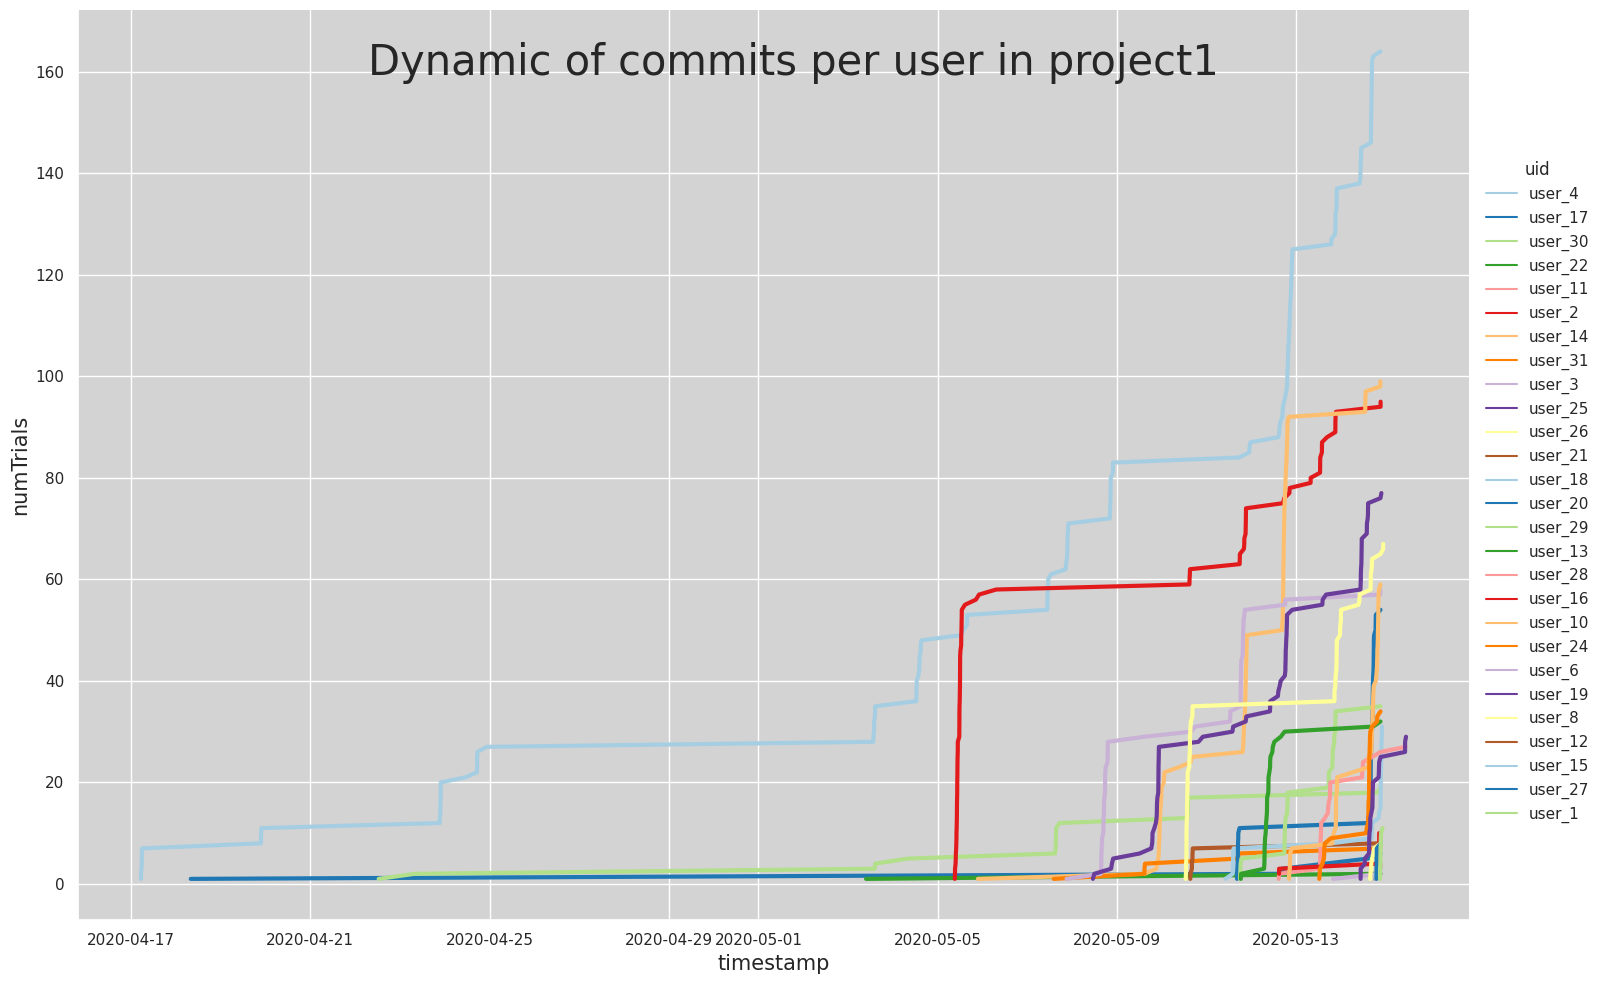

In [156]:
sns.set(rc={'axes.facecolor':'lightgray',
            'axes.labelsize': 15})
sns.relplot(df, x='timestamp', hue='uid', y='numTrials', kind='line', height=10, aspect=1.5, linewidth=3, palette='Paired')
plt.suptitle('Dynamic of commits per user in project1', fontsize=30, y=0.95)
plt.show()

## • at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):
◦ “Which user was the leader in the number of commits almost all of the time?”
The answer: user_4.
◦ “Which user was the leader for only a short period of time?” The answer:
user_2.

In [ ]:
con.close()